In [ ]:
#!pip install tf-nightly --quiet
import glob
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import timeit
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers, models, Model
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow import keras



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


2.2.0


In [ ]:
drive.mount('/content/drive', force_remount=True)
!unzip -q "/content/drive/My Drive/Colab Notebooks/Shirt_Images.zip"
!unzip -q "/content/drive/My Drive/Colab Notebooks/Shoe_Images.zip"
!unzip -q "/content/drive/My Drive/Colab Notebooks/Watch_Images.zip"
!mkdir Dataset
!mv Shirt_Images Dataset
!mv Shoe_Images Dataset
!mv Watch_Images Dataset

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Reading the Dataset

In [ ]:
path = "Dataset/" 
image_size = 128
channels = 3
types = ["Shirt_Images", "Shoe_Images", "Watch_Images"]
# labels = []
# images = []

total_images = 0
for root, dirs, files in os.walk(path):
    total_images += len(files)
labels = np.empty(total_images)
images = np.empty((total_images,image_size,image_size,channels))
gray_images = np.empty((total_images,image_size,image_size))
heights = np.empty(total_images)
widths = np.empty(total_images) 
count = 0
for i in types:
    print("Reading the  data for: ", i)
    for p in os.listdir(path + i):
        image = cv2.imread(path + i + '/' + p)
        heights[count] = image.shape[0]
        widths[count] = image.shape[1]
        #height.append(image.shape[0])
        #width.append(image.shape[1])
        image = cv2.resize(image, (image_size, image_size))
        #images.append(image) 
        #labels.append(types.index(i))
        gray_images[count] = (cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))/255.2
        image = image/255.0
        images[count] = image
        labels[count] = types.index(i)
        
        count+=1

# print("\nNumber of Dataset {} and Number of Labels {}".format(len(images),len(labels))) 
# print("Single Image Shape:", dataset[0].shape)

Reading the  data for:  Shirt_Images
Reading the  data for:  Shoe_Images
Reading the  data for:  Watch_Images


## Height and Width Distributions

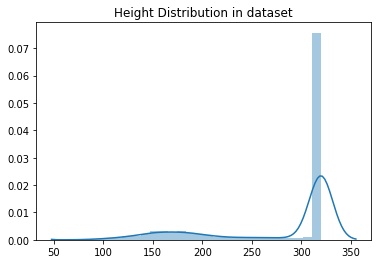

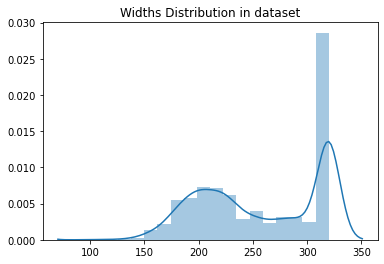

In [ ]:
sns.distplot(heights)
plt.title("Height Distribution in dataset")
plt.show()
sns.distplot(widths)
plt.title("Widths Distribution in dataset")
plt.show()

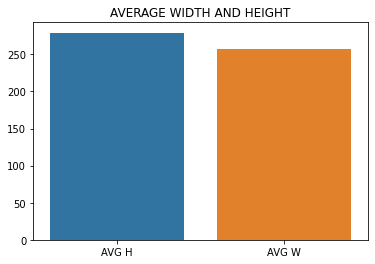

In [ ]:
average_height = np.mean(heights)
average_width = np.mean(widths)
sns.barplot(x=['AVG H','AVG W'],y=[average_height,average_width])
plt.title("AVERAGE WIDTH AND HEIGHT")
plt.show()

## Displaying some random images from dataset

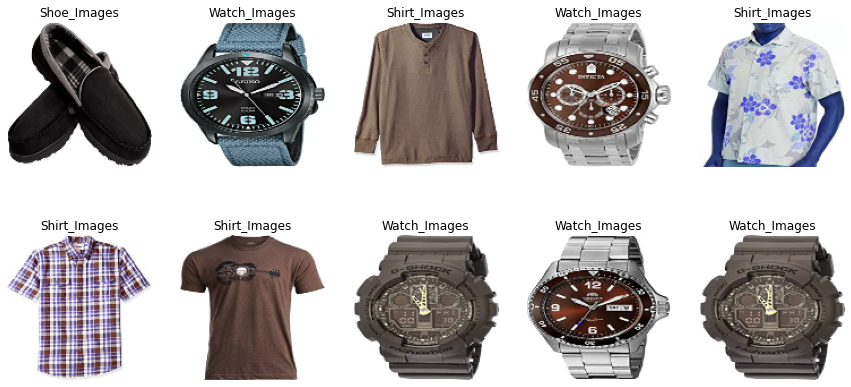

In [ ]:
index = np.random.randint(0, len(images) - 1, size= 10)
plt.figure(figsize=(15,15))
for i, index in enumerate(index, 1):
    img = images[index]
    type_ind = labels[index]
    title = types[int(type_ind)]
    plt.subplot(4, 5, i)
    plt.title(title)
    plt.axis('off')
    plt.imshow(img)

## Flattening the images

In [ ]:
images_flattened = images.reshape(images.shape[0],-1)
gray_images_flattened = gray_images.reshape(gray_images.shape[0],-1)

## PCA on both color images and grayscale

In [ ]:
time = {}

In [ ]:
pca = PCA(n_components=3)
time['pca_color_start'] = timeit.default_timer()
pca_result = pca.fit_transform(images_flattened)
time['pca_color_stop'] = timeit.default_timer()

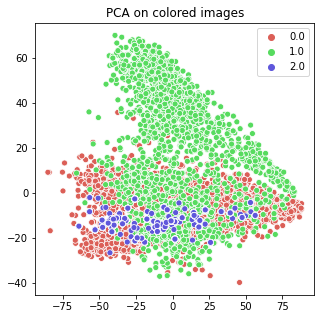

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1],hue=labels,palette=sns.color_palette("hls", 3),legend="full")
plt.title("PCA on colored images")
plt.show()

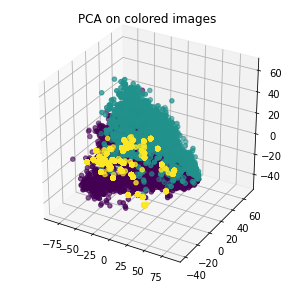

In [ ]:
ax = plt.figure(figsize=(5,5)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=labels
)
plt.title("PCA on colored images")
plt.show()

In [ ]:
pca = PCA(n_components=3)
time['pca_gray_start'] = timeit.default_timer()
pca_result = pca.fit_transform(gray_images_flattened)
time['pca_gray_stop'] = timeit.default_timer()

In [ ]:
pca_color_time = time['pca_color_stop']-time['pca_color_start']
pca_gray_time = time['pca_gray_stop']-time['pca_gray_start']
print(pca_color_time)
print(pca_gray_time)

23.604665687000306
7.099785657999746


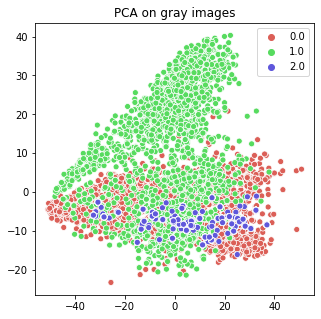

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1],hue=labels,palette=sns.color_palette("hls", 3),legend="full")
plt.title("PCA on gray images")
plt.show()

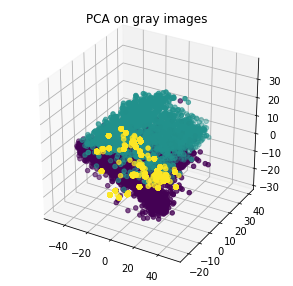

In [ ]:
ax = plt.figure(figsize=(5,5)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=labels
)
plt.title("PCA on gray images")
plt.show()

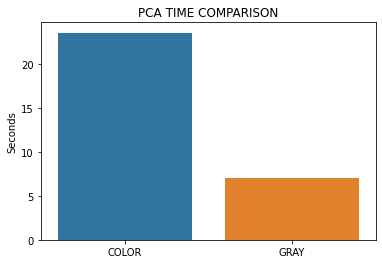

In [ ]:
sns.barplot(x=['COLOR','GRAY'],y=[pca_color_time,pca_gray_time])
plt.title("PCA TIME COMPARISON")
plt.ylabel('Seconds')
plt.show()

## t-SNE on both color images and grayscale

In [ ]:
time['tsne_color_start'] = timeit.default_timer()
tsne = TSNE(n_components=2).fit_transform(images_flattened)
time['tsne_color_stop'] = timeit.default_timer()


In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(
    x=tsne[:,0], y=tsne[:,1],
    hue=labels,
    palette=sns.color_palette("hls", 3),
    legend="full",
    alpha=0.3
)
plt.show()

## Applying tSNE on feature extraced by modified LeNet

In [ ]:
numChannels = 3
numClasses = 3
model = models.Sequential()
inputShape = (image_size, image_size, numChannels)
model.add(layers.Conv2D(filters= 6, kernel_size= 5,activation="relu", input_shape= inputShape))
model.add(layers.MaxPooling2D(pool_size= (2, 2), strides= (2, 2)))
model.add(layers.Conv2D(filters= 16, kernel_size= 5,activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
features = model.predict(images)

In [ ]:
tsne = TSNE(n_components=2).fit_transform(features)

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=tsne[:,0], y=tsne[:,1],
    hue=labels,
    palette=sns.color_palette("hls", 3),
    legend="full",
)

##Train Test Split

In [ ]:
labels_categorical = to_categorical(labels)
# Split Dataset to train\test
trainX, testX, trainY, testY = train_test_split(images, labels_categorical, test_size=0.2, random_state=1)
print("X Train shape:", trainX.shape)
print("X Test shape:", testX.shape)
print("Y Train shape:", trainY.shape)
print("Y Test shape:", testY.shape)

X Train shape: (4838, 128, 128, 3)
X Test shape: (1210, 128, 128, 3)
Y Train shape: (4838, 3)
Y Test shape: (1210, 3)


## Training on modified LeNet

In [ ]:
numChannels = 3
numClasses = 3
model = models.Sequential()
inputShape = (image_size, image_size, numChannels)
model.add(layers.Conv2D(filters= 6, kernel_size= 5,activation="relu", input_shape= inputShape))
model.add(layers.MaxPooling2D(pool_size= (2, 2), strides= (2, 2)))
model.add(layers.Conv2D(filters= 16, kernel_size= 5,activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120))
model.add(layers.Dropout(0.5))
model.add(layers.ReLU())
model.add(layers.Dense(84))
model.add(layers.Dropout(0.5))
model.add(layers.ReLU())
model.add(layers.Dense(numClasses))
model.add(layers.Softmax())
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 6)       456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 13456)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               1614840   
_________________________________________________________________
dropout (Dropout)            (None, 120)               0

In [ ]:
BS = 128
LR = 0.01
EPOCHS = 3
model.compile(loss= "categorical_crossentropy", optimizer= 'adam', metrics= ["accuracy"])
history = model.fit(trainX, trainY, validation_data= (testX, testY), batch_size= BS,epochs= EPOCHS, verbose=1)

Epoch 1/3
38/38 [==============================] - 2s 50ms/step - loss: 0.8685 - accuracy: 0.6935 - val_loss: 0.1626 - val_accuracy: 0.9554
Epoch 2/3
38/38 [==============================] - 1s 39ms/step - loss: 0.1895 - accuracy: 0.9332 - val_loss: 0.0964 - val_accuracy: 0.9702
Epoch 3/3
38/38 [==============================] - 1s 34ms/step - loss: 0.1235 - accuracy: 0.9638 - val_loss: 0.0763 - val_accuracy: 0.9769


In [ ]:
model.save('lenet_trained_model.h5') #will save the model in current directory

In [ ]:
scores_train = model.evaluate(trainX, trainY, verbose= 1)
scores_test = model.evaluate(testX, testY, verbose= 1)
print("\nModel Accuracy on Train Data: %.2f%%" % (scores_train[1]*100))
print("Model Accuracy on Test Data: %.2f%%" % (scores_test[1]*100))

38/38 [==============================] - 0s 9ms/step - loss: 0.0567 - accuracy: 0.9843

Model Accuracy on Train Data: 98.95%
Model Accuracy on Test Data: 98.43%


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

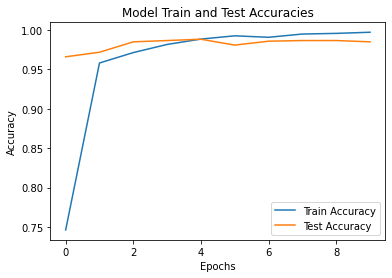

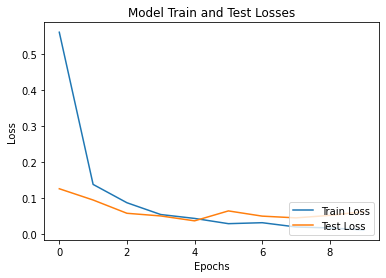

In [ ]:
plt.plot(np.arange(0, EPOCHS), history.history["accuracy"], label="Train Accuracy")
plt.plot(np.arange(0, EPOCHS), history.history["val_accuracy"], label="Test Accuracy")
plt.title("Model Train and Test Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()
plt.plot(np.arange(0, EPOCHS), history.history["loss"], label="Train Loss")
plt.plot(np.arange(0, EPOCHS), history.history["val_loss"], label="Test Loss")
plt.title("Model Train and Test Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="lower right")
plt.show()

In [ ]:

Y_prediction = model.predict(testX)
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
Y_true = np.argmax(testY,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

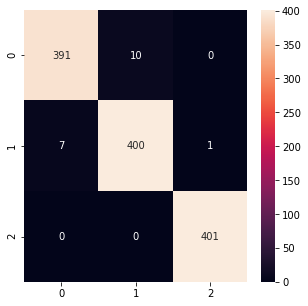

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

## Feature Maps Visualizations

In [ ]:
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d (5, 5, 3, 6)
conv2d_1 (5, 5, 6, 16)


In [ ]:
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(images[0].reshape(1,image_size,image_size,3))
 

In [ ]:
len(activations)

2

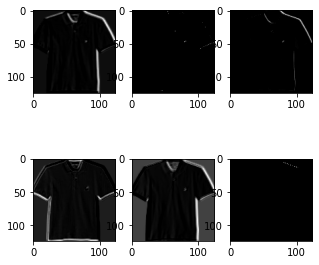

In [ ]:
activation = activations[0]
idx=0
row_size = 2
col_size = 3
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, idx], cmap='gray')
            idx += 1

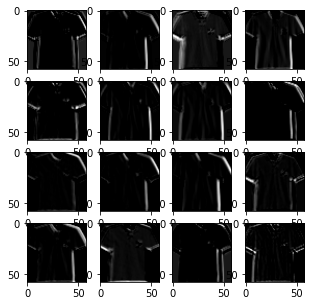

In [ ]:
activation = activations[1]
idx=0
row_size = 4
col_size = 4
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, idx], cmap='gray')
            idx += 1

## Xception Part

In [ ]:
data_augmentation = keras.Sequential([
  layers.experimental.preprocessing.RandomFlip('horizontal'),
  layers.experimental.preprocessing.RandomRotation(0.1),
])

In [ ]:
def make_model(input_shape, num_classes):
  inputs = keras.Input(shape=input_shape)
  # Image augmentation block
  x = data_augmentation(inputs)

  # Entry block
  x = layers.experimental.preprocessing.Rescaling(1./255)(x)
  x = layers.Conv2D(32, 3, strides=2, padding='same')(inputs)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(64, 3, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.3)(x)

  previous_block_activation = x  # Set aside residual
  
  for size in [128, 256, 512, 728]:
    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(size, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(size, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    x = layers.Dropout(0.5)(x)
    
    # Project residual
    residual = layers.Conv2D(
        size, 1, strides=2, padding='same')(previous_block_activation)
    x = layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

  x = layers.SeparableConv2D(1024, 3, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.5)(x)
  
  x = layers.GlobalAveragePooling2D()(x)
  activation = 'softmax'
  units = num_classes
  
  
  outputs = layers.Dense(units, activation=activation)(x)
  return keras.Model(inputs, outputs)


In [ ]:
model = make_model(input_shape=(image_size,image_size,numChannels), num_classes=3)

In [ ]:
BS = 128
LR = 0.01
EPOCHS = 3
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(trainX, trainY, validation_data= (testX, testY), batch_size= BS,epochs= EPOCHS, verbose=1)

Epoch 1/3
38/38 [==============================] - 35s 920ms/step - loss: 0.6292 - accuracy: 0.7233 - val_loss: 1.1802 - val_accuracy: 0.3314
Epoch 2/3
38/38 [==============================] - 32s 835ms/step - loss: 0.0998 - accuracy: 0.9691 - val_loss: 1.3901 - val_accuracy: 0.3314
Epoch 3/3
38/38 [==============================] - 32s 833ms/step - loss: 0.0511 - accuracy: 0.9840 - val_loss: 1.6013 - val_accuracy: 0.3314


In [ ]:
scores_train = model.evaluate(trainX, trainY, verbose= 1)
scores_test = model.evaluate(testX, testY, verbose= 1)
print("\nModel Accuracy on Train Data: %.2f%%" % (scores_train[1]*100))
print("Model Accuracy on Test Data: %.2f%%" % (scores_test[1]*100))

ValueError: ignored

In [ ]:
testY[0]

array([1., 0., 0.], dtype=float32)